# **project 3**

# Social Media Sentiments Analysis

# Questions
1) What is the overall distribution of sentiments (positive, negative, neutral) across the posts?

2) Which platform generates the most engagement in terms of likes and retweets?

3) Which users have the highest average engagement (likes and retweets per post)?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data =  pd.read_csv("sentimentdataset.csv")
data.head()


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [22]:
data.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [20]:
data.shape

(732, 15)

In [15]:
print(len(data))

732


In [18]:
data=data.drop_duplicates()
print(len(data))

732


In [13]:
data.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Text,0
Sentiment,0
Timestamp,0
User,0
Platform,0
Hashtags,0
Retweets,0
Likes,0


# 1) What is the overall distribution of sentiments (positive, negative, neutral) across the posts?

In [23]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [33]:

df1 = data[["Sentiment"]].value_counts().reset_index(name = "Distribution")
df2 = df1.head(15)
df2

,Sentiment,Distribution
0,Positive,44
1,Joy,42
2,Excitement,32
3,Happy,14
4,Contentment,14
5,Neutral,14
6,Gratitude,9
7,Sad,9
8,Hopeful,9
9,Curiosity,8


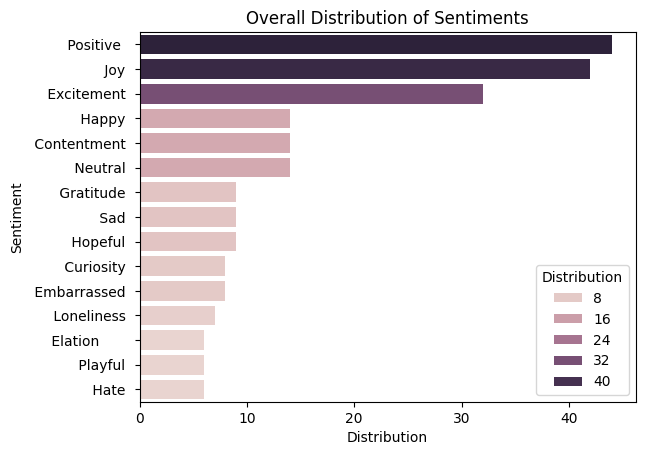

In [34]:
sns.barplot(data = df2,x = "Distribution",y = "Sentiment",hue = "Distribution")
plt.title("Overall Distribution of Sentiments")
plt.show()


# 2) Which platform generates the most engagement in terms of likes and retweets?

In [36]:
data.head(5)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [43]:
df1 = data.groupby('Platform')[['Likes']].sum().reset_index()
df1

,Platform,Likes
0,Facebook,9672.0
1,Instagram,11633.0
2,Twitter,5809.0
3,Twitter,4290.0


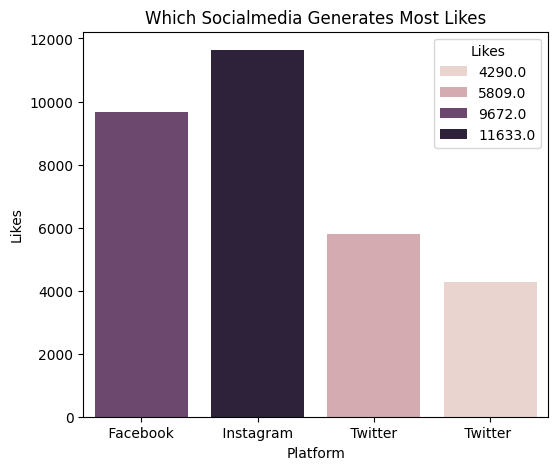

In [47]:
plt.figure(figsize = (6,5))
sns.barplot(data = df1,x = "Platform",y = "Likes",hue = "Likes")
plt.title("Which Socialmedia Generates Most Likes")
plt.show()

In [44]:
df2 = data.groupby('Platform')[['Retweets']].sum().reset_index()
df2

,Platform,Retweets
0,Facebook,4844.0
1,Instagram,5831.0
2,Twitter,2918.0
3,Twitter,2151.0


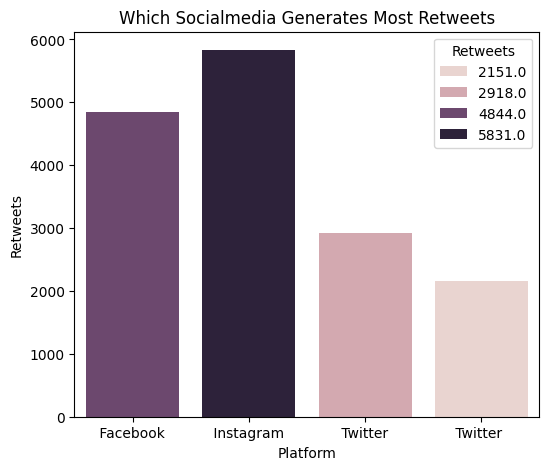

In [50]:
plt.figure(figsize = (6,5))
sns.barplot(data=df2,x = "Platform",y = "Retweets",hue = "Retweets")
plt.title("Which Socialmedia Generates Most Retweets")
plt.show()


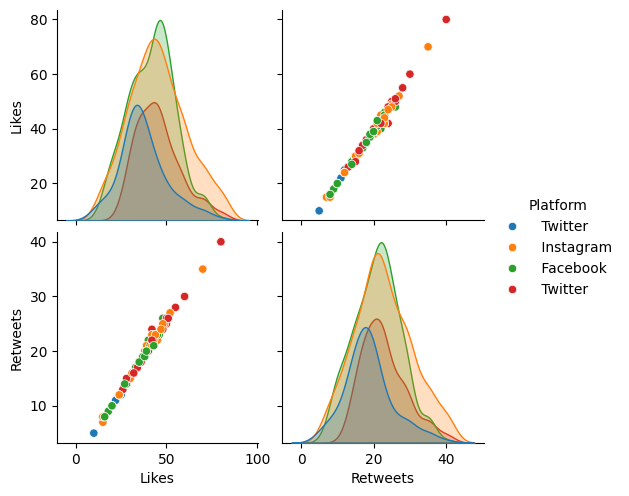

In [52]:
sns.pairplot(data[['Platform', 'Likes', 'Retweets']],hue = "Platform")
plt.show()


# 3) Which users have the highest average engagement (likes and retweets per post)?

In [53]:
data.head(3)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15


In [70]:
df1 = data.groupby("User")["Likes"].sum().reset_index()
df1

,User,Likes
0,AbyssOfTime,45.0
1,AcceptanceSeeker,30.0
2,AdeleConcertGoer,80.0
3,AdeleMelodyTearjerker,60.0
4,AdventureAwaits,40.0
...,...,...
680,YearbookExplorer,25.0
681,ZenLifestyle,30.0
682,ZenMaster,30.0
683,ZenMaster2,35.0


In [71]:
df2 = df1.head(10)
df2

,User,Likes
0,AbyssOfTime,45.0
1,AcceptanceSeeker,30.0
2,AdeleConcertGoer,80.0
3,AdeleMelodyTearjerker,60.0
4,AdventureAwaits,40.0
5,AdventureAwaits,40.0
6,AdventureSeeker,35.0
7,AdventureX,15.0
8,AffectionSender,30.0
9,AloofObserver,20.0


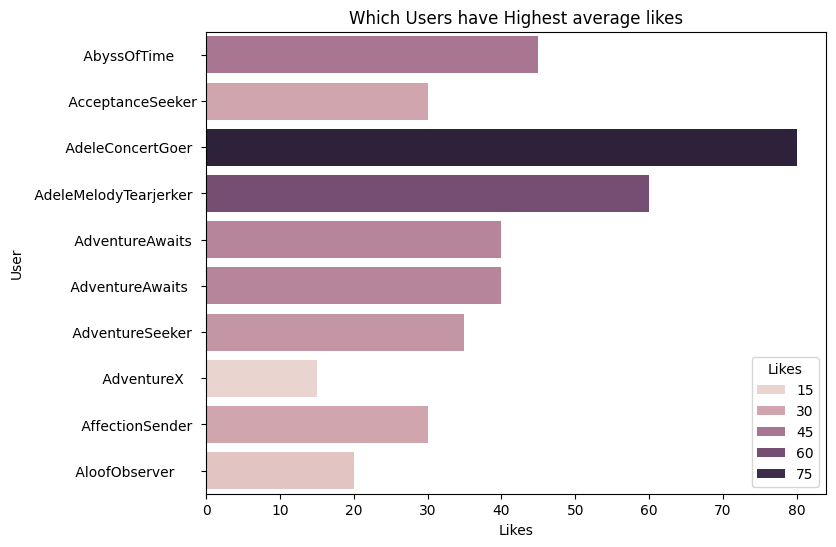

In [72]:
plt.figure(figsize = (8,6))
sns.barplot(data=df2,x = "Likes",y = "User",hue = "Likes")
plt.title("Which Users have Highest average likes")
plt.show()

In [65]:
df1 = data.groupby("User")["Retweets"].sum().reset_index()
df1


,User,Retweets
0,AbyssOfTime,22.0
1,AcceptanceSeeker,15.0
2,AdeleConcertGoer,40.0
3,AdeleMelodyTearjerker,30.0
4,AdventureAwaits,20.0
...,...,...
680,YearbookExplorer,12.0
681,ZenLifestyle,15.0
682,ZenMaster,15.0
683,ZenMaster2,18.0


In [66]:
df2 = df1.head(10)
df2

,User,Retweets
0,AbyssOfTime,22.0
1,AcceptanceSeeker,15.0
2,AdeleConcertGoer,40.0
3,AdeleMelodyTearjerker,30.0
4,AdventureAwaits,20.0
5,AdventureAwaits,20.0
6,AdventureSeeker,18.0
7,AdventureX,8.0
8,AffectionSender,15.0
9,AloofObserver,10.0


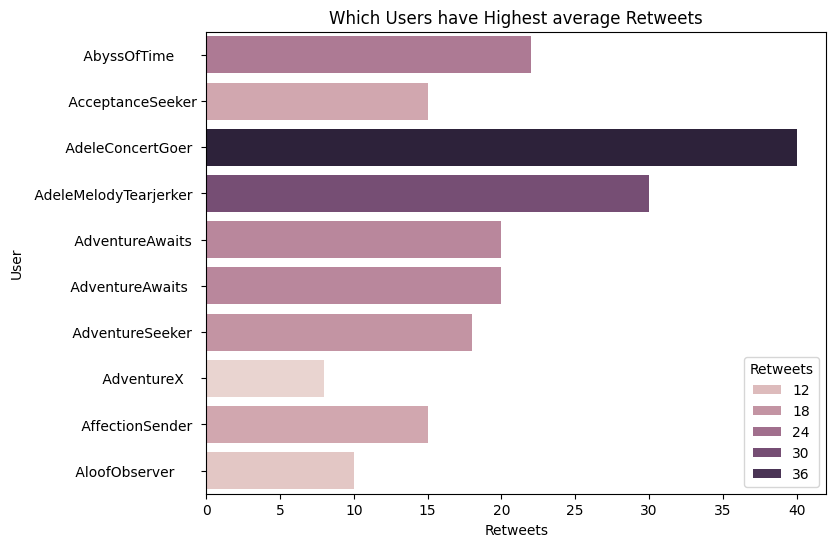

In [67]:
plt.figure(figsize = (8,6))
sns.barplot(data = df2,x = "Retweets",y = "User",hue = "Retweets")
plt.title("Which Users have Highest average Retweets")
plt.show()


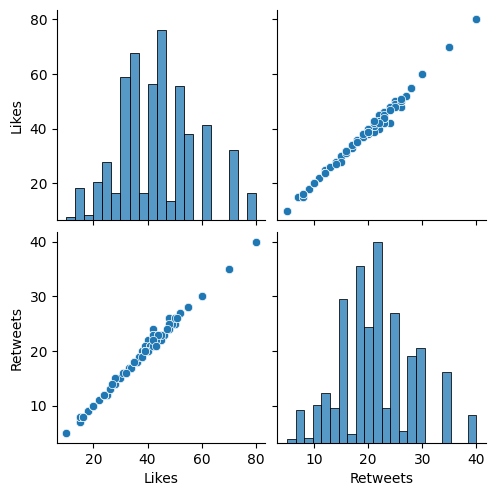

In [74]:
sns.pairplot(data[['User', 'Likes', 'Retweets']])
plt.show()